In [1]:
#import all the libraries we need
from bs4 import BeautifulSoup
import requests
import MySQLdb as mdb
import datetime
from datetime import date, datetime, timedelta
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import time
import arrow
import re
import requests
import json
import MySQLdb as mdb
import pandas as pd
from tabulate import tabulate
import matplotlib
import matplotlib.pyplot as plt
from slackclient import SlackClient

# Make the graphs a bit prettier, and bigger
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
#connects to MySQL to pull info from our database

conn_string_realmdata = 'mysql://{user}:{password}@{host}:{port}/{db}'.format(
    user='root', 
    password='dwdstudent2015', 
    host = 'localhost', 
    port=3306, 
    db='realmdata'
)
engine_realmdata = create_engine(conn_string_realmdata)

In [3]:
query = '''
SELECT * FROM recent_deaths LIMIT 20
'''
total_realmdata = pd.read_sql(query, con=engine_realmdata)
total_realmdata

#our data from SQL can be pulled with a query

,char_id,char_name,death_cause,date,char_stats,base_fame,total_fame,weapon,ability,armor,ring,back
0,1,Olimar,Hot Lava,2017-12-12,7/8,1245.0,1601.0,Staff of the Cosmic Whole T12,Elemental Detonation Spell T6,Soulless Robe UT,Ring of the Pyramid UT,Empty Slot
1,2,hidden,hidden,NaT,hidden,NaN,NaN,hidden,hidden,hidden,hidden,hidden
2,3,BlackVault,Suffocation,2017-12-12,4/8,499.0,813.0,Dagger of Foul Malevolence T12,Cloak of the Planewalker UT,Griffon Hide Armor T12,Ring of Paramount Health T4,Empty Slot
3,4,Bobbykill,Oryx Insect Minion,2017-12-12,6/8,836.0,1399.0,Frosty's Walking Stick UT,Skullish Remains of Esben UT,Soulless Robe UT,Ring of Decades UT,Empty Slot
4,5,Antonioo,shtrs Defense System,2017-12-12,3/8,441.0,575.0,Frostbite UT,Mithril Shield T5,Abyssal Armor T12,Ring of Paramount Health T4,Empty Slot
5,6,XCrazyGuyL,Ice Tomb Attacker,2017-12-12,5/8,334.0,531.0,Saint Nicolas' Blade UT,Advent Seal T6,Abyssal Armor T12,Ring of the Northern Light UT,Empty Slot
6,7,Shimmers,Ice Tomb Attacker,2017-12-12,5/8,837.0,1385.0,An Icicle UT,Felwasp Toxin T4,Griffon Hide Armor T12,Amulet of Drakefyre UT,Empty Slot
7,8,hidden,hidden,NaT,hidden,NaN,NaN,hidden,hidden,hidden,hidden,hidden
8,9,hidden,hidden,NaT,hidden,NaN,NaN,hidden,hidden,hidden,hidden,hidden
9,10,Btdsts,Lava,2017-12-12,2/8,260.0,323.0,An Icicle UT,Nightwing Venom T5,Griffon Hide Armor T12,Ring of Paramount Magic T4,Empty Slot


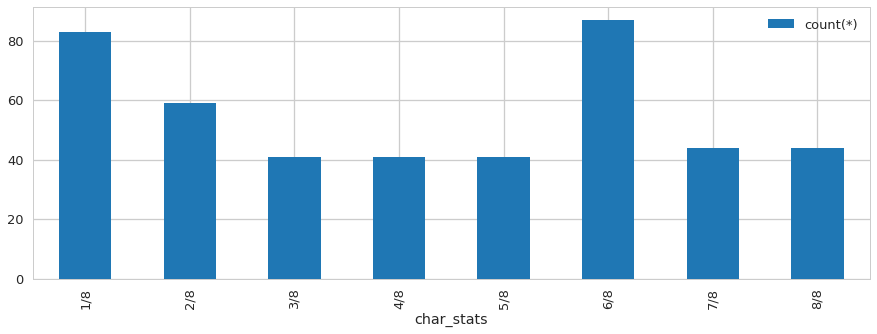

In [4]:
query2 = '''
SELECT char_stats , count(*) 
FROM recent_deaths 
WHERE char_stats != "hidden"
GROUP BY `char_stats`
'''
df_realmdata = pd.read_sql(query2, con=engine_realmdata)
df_realmdata2 = df_realmdata.set_index('char_stats')
orange = df_realmdata2.plot(kind="bar")
#this query is stored into a panda dataframe for graphing

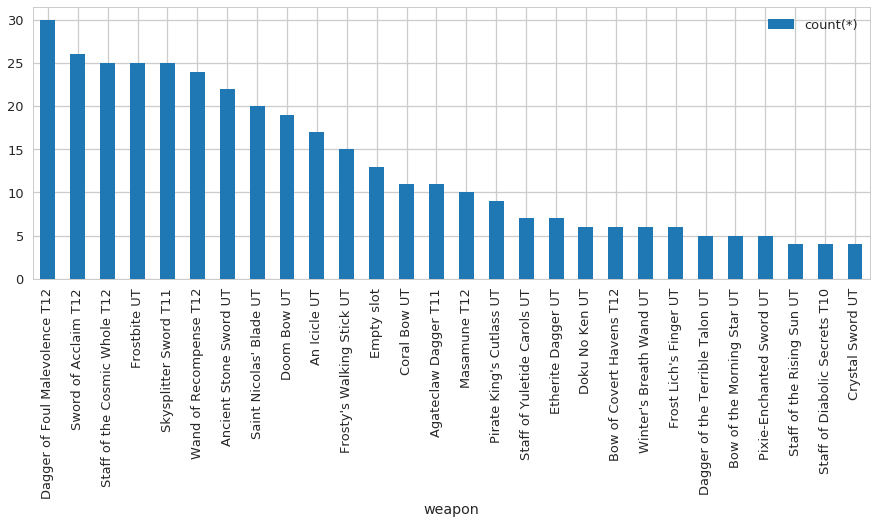

In [5]:
query3 = '''
SELECT weapon , count(*)
FROM recent_deaths
WHERE weapon != "hidden"
GROUP BY weapon
HAVING count(*) > 3
ORDER BY count(*) DESC
'''
weapondata = pd.read_sql(query3, con = engine_realmdata)
weapondata2 = weapondata.set_index("weapon")
orange = weapondata2.plot(kind = "bar")

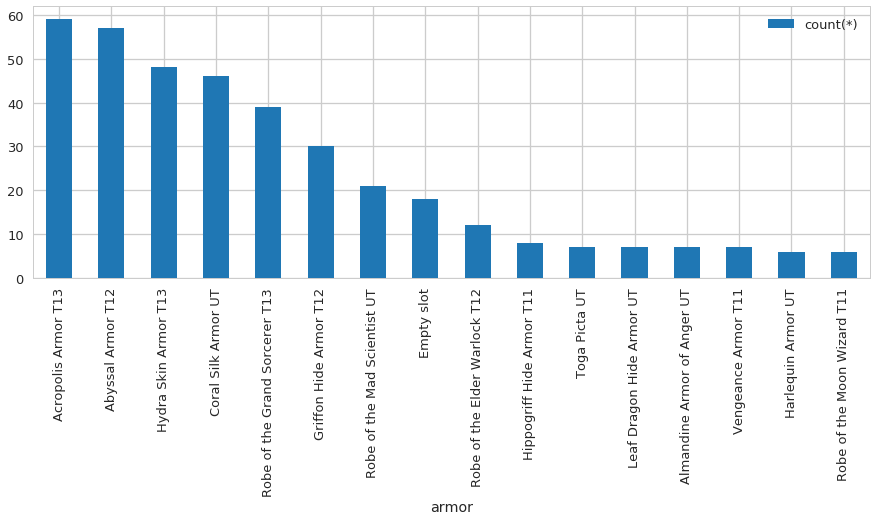

In [6]:
query3 = '''
SELECT armor , count(*)
FROM recent_deaths
WHERE armor != "hidden"
GROUP BY armor
HAVING count(*) > 5
ORDER BY count(*) DESC
'''
armor = pd.read_sql(query3, con = engine_realmdata)
armor2 = armor.set_index("armor")
armfig = armor2.plot(kind = "bar")
armfig

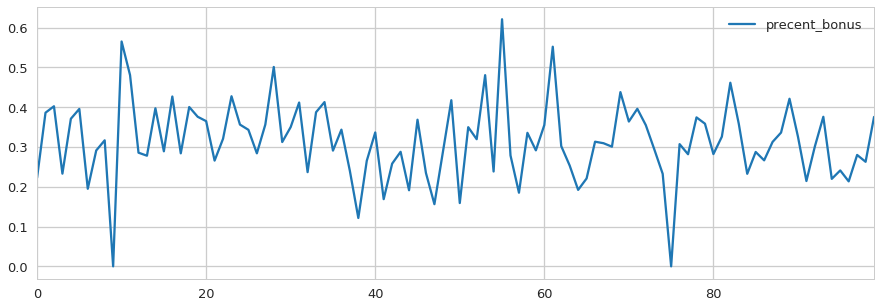

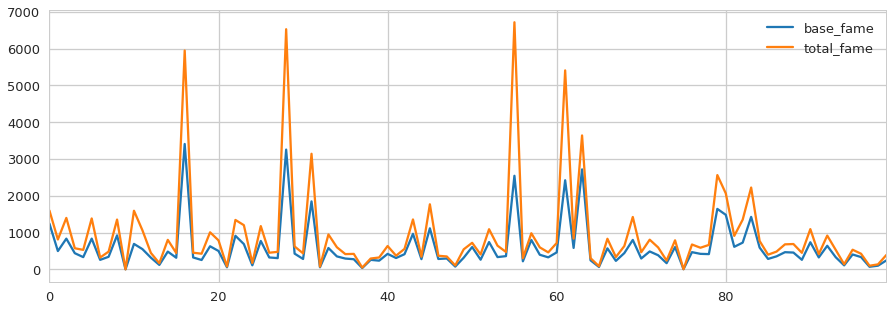

In [7]:
query5 = '''
SELECT ((total_fame - base_fame)/total_fame) as precent_bonus
FROM recent_deaths
WHERE base_fame > 0 
LIMIT 100
'''
fame = pd.read_sql(query5, con = engine_realmdata)
apple = fame.plot()

query6 = '''
SELECT base_fame, total_fame
FROM recent_deaths
WHERE base_fame > 0 
LIMIT 100
'''
    
fame2 = pd.read_sql(query6, con = engine_realmdata)
orange = fame2.plot()